In [18]:
%load_ext tikzmagic
%matplotlib inline

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# 회귀분석

어떤 수치형 변수의 값이 다른 변수의 값에 의해 어떻게 영향을 받는지를 분석하는 방법을 <b>회귀분석(regression analysis)</b>이라고 한다. 


예를 들어 다음 데이터는 1940년부터 1950년까지의 미국 전체의 소득(income)과 지출(expenditure) 데이터이다. 테이블에서 하나의 레코드는 하나의 연도(year)를 나타낸다. 

In [19]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset("USConsump1950", "AER").data
df

,income,expenditure,war
0,241,226,0
1,280,240,0
2,319,235,1
3,331,245,1
4,345,255,1
5,340,265,1
6,332,295,0
7,320,300,0
8,339,305,0
9,338,315,0


이 데이터를 다음과 같이 소득을 가로축으로 지출을 세로축으로 한 스캐터플롯(scatter plot)으로 표시한다. 이 그래프에서는 하나의 점이 하나의 연도 즉, 하나의 레코드를 표시한다. 

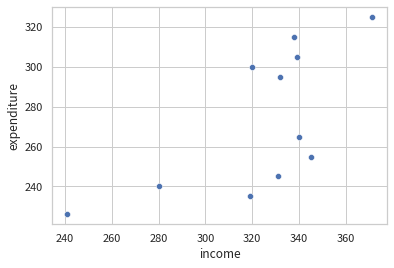

In [25]:
import seaborn as sns

sns.scatterplot(data=df, x="income", y="expenditure")
plt.show()

이 그래프를 보면 소득이 증가한 경우에는 지출도 같이 증가하는 것처럼 보인다. 

회귀분석에서 분석의 대상이 되는 수치형 변수를 <b>종속변수(independent variable)</b>라 하고 그 종속변수에 영향을 주는 다른 변수들을 <b>독립변수(dependent variable)</b>라 한다. 보통 종속변수는 $y$ 기호로 나타내고 독립변수는 $x$ 기호로 나타낸다. 독립변수가 여러개 있을 때는 $x_1, x_2, \ldots, x_K$ 등으로 아랫첨자를 이용하여 표시한다.


회귀분석에서 종속변수와 독립변수의 관계는 다음과 같은 다이어그램으로 표현할 수 있다. 화살표는 변수간의 관계를 나타내는 것으로 독립변수에서 종속변수를 향하는 방향으로 그린다. 


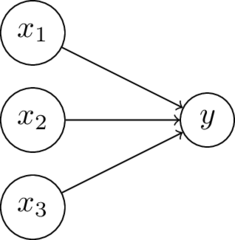

In [12]:
%%tikz
\node[draw,circle] (x1) at (0,2) {$x_1$};
\node[draw,circle] (x2) at (0,1) {$x_2$};
\node[draw,circle] (x3) at (0,0) {$x_3$};
\node[draw,circle] (y) at (2,1) {$y$};
\draw[->] (x1)--(y);
\draw[->] (x2)--(y);
\draw[->] (x3)--(y);

회귀분석은 복수의 독립변수 $x_1, x_2, \ldots, x_K$와 하나의 종속변수 $y$간의 관계를 분석하는 것이다. 회귀분석을 하려면 독립변수와 종속변수의 관계를 수식으로 정해놓아야 한다. 이 수식을 회귀분석 모형(regression model)이라고 한다. 가장 많이 사용되는 회귀분석 모형은 선형 회귀분석 모형(linear regression model)이다. 선형 회귀분석 모형은 다음과 같은 수식으로 표현한다. 

$$ y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_K x_K + \epsilon $$